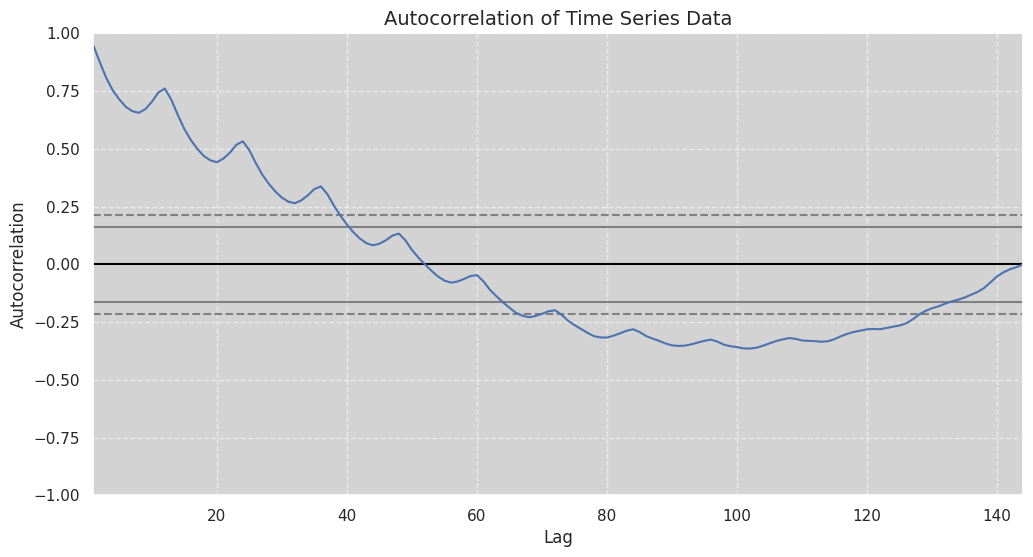

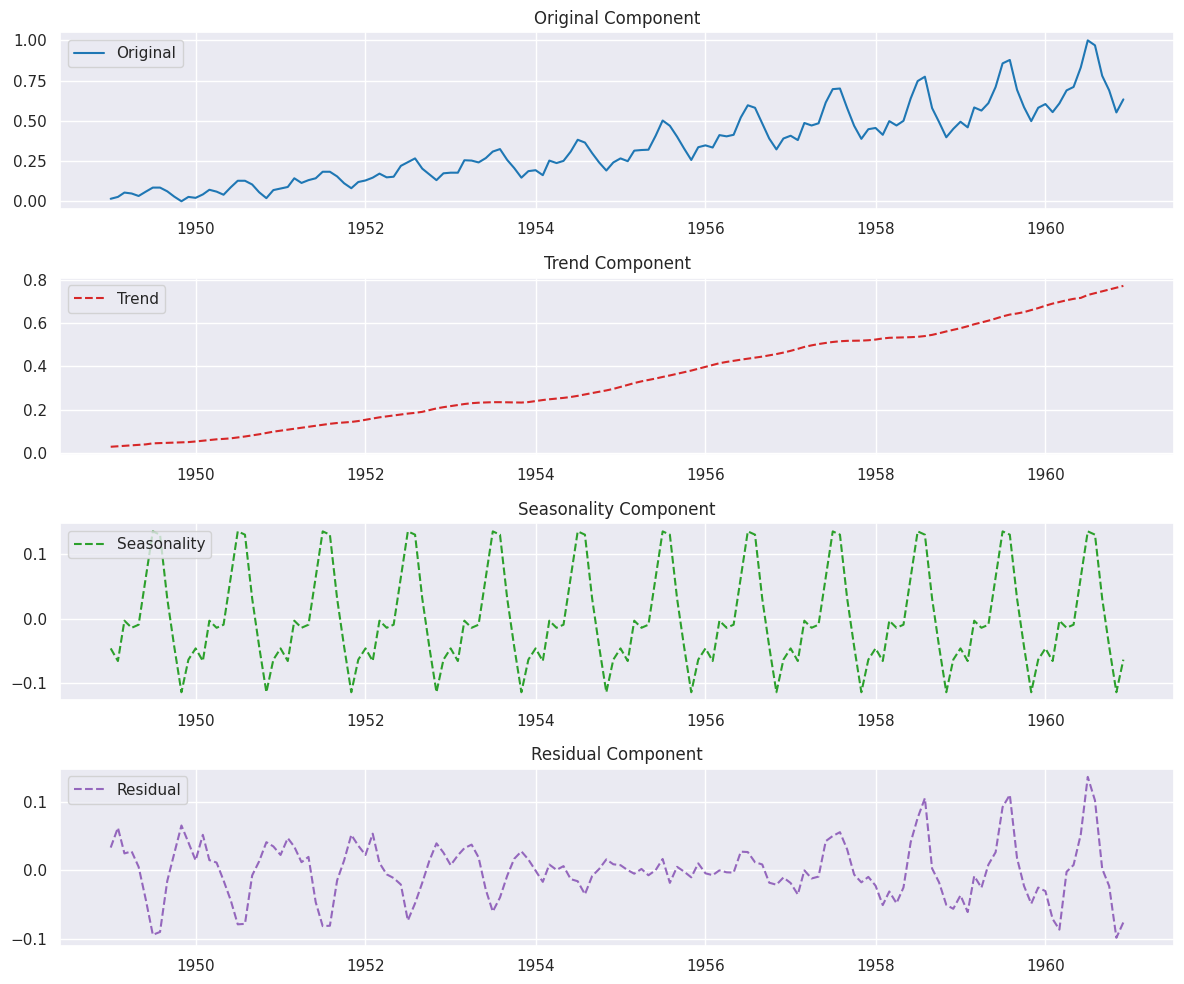

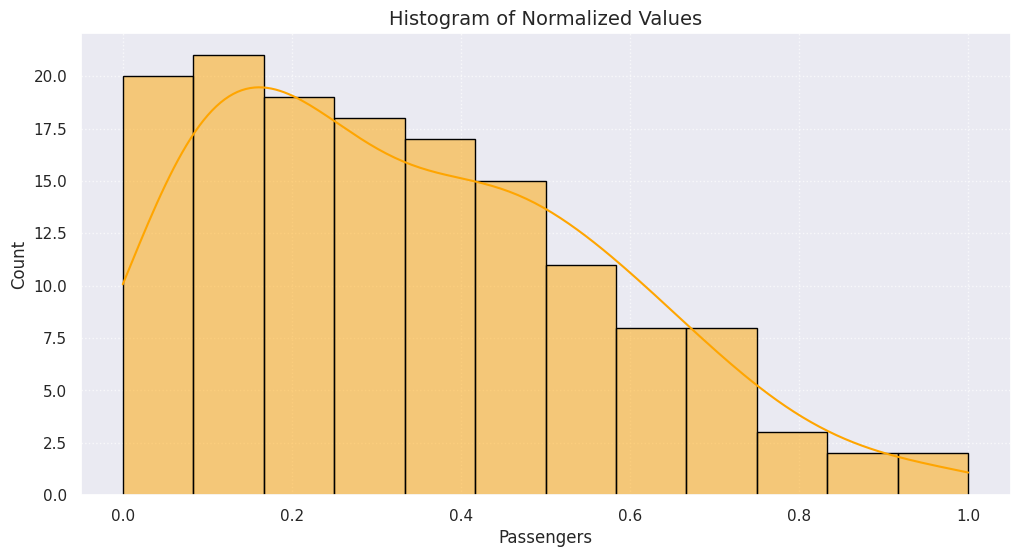

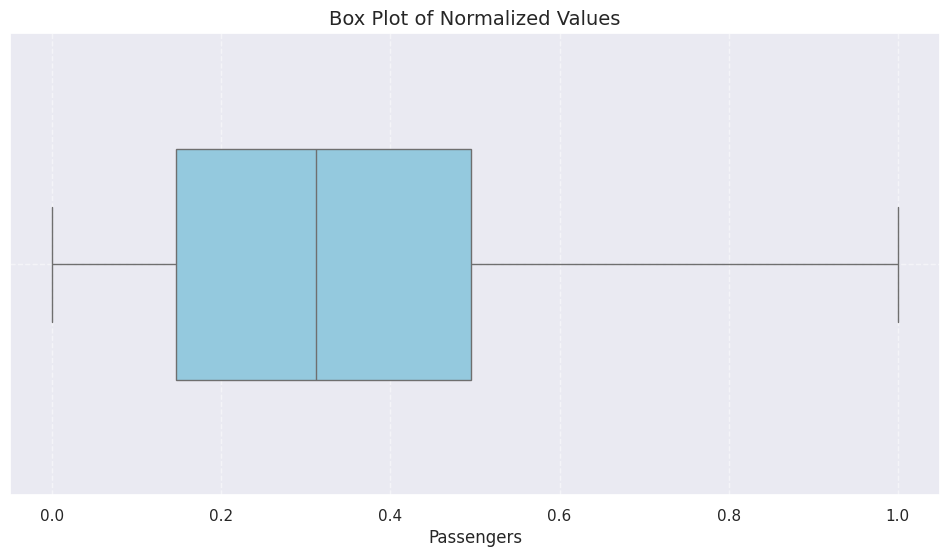

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Load the dataset from a local path (modify with your path if needed)
file_path = '/content/AirPassengers.csv'
df = pd.read_csv(file_path)

# Prepare the time series data
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Passengers']

# Normalize and smooth the data
ts_normalized = (ts - ts.min()) / (ts.max() - ts.min())
ts_smoothed = ts_normalized.rolling(window=5, min_periods=1).mean()

# Set random seed and seaborn style
np.random.seed(42)
sns.set(style="darkgrid")

# Visualization: Autocorrelation Plot with modified style
plt.figure(figsize=(12, 6))
autocorrelation_plot(ts_normalized)
plt.title('Autocorrelation of Time Series Data', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_facecolor('lightgray')
plt.show()

# Visualization: Time Series Decomposition with different line styles and colors
decomposition = seasonal_decompose(ts_normalized, period=12, model='additive', extrapolate_trend='freq')
plt.figure(figsize=(12, 10))

for i, (component, title) in enumerate(zip([ts_normalized, decomposition.trend, decomposition.seasonal, decomposition.resid],
                                            ['Original', 'Trend', 'Seasonality', 'Residual']), 1):
    plt.subplot(4, 1, i)
    plt.plot(ts.index, component, label=title, linestyle='-' if i == 1 else '--', color='tab:blue' if i == 1 else 'tab:red' if i == 2 else 'tab:green' if i == 3 else 'tab:purple')
    plt.title(f'{title} Component', fontsize=12)
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Additional Visualizations: Histogram with different color and annotation
plt.figure(figsize=(12, 6))
sns.histplot(ts_normalized, bins=12, kde=True, color='orange', edgecolor='black')
plt.title('Histogram of Normalized Values', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Box Plot with adjusted color and style
plt.figure(figsize=(12, 6))
sns.boxplot(x=ts_normalized, color='skyblue', width=0.5)
plt.title('Box Plot of Normalized Values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

